##Python para Análise de Dados (Pandas) - By Roberto Pivetta
(Desafio de projeto - Digital Innovation One) - Prof. Fernanda Santos (Data Scientist)
<center> Bootcamp: Cognizant Cloud Data Engineer </center>

- Trabalhando com Planilhas do Excel
- Trabalhando com Datas
- Visualização de Dados

#**1- TRABALHANDO COM PLANILHAS DO EXCEL**

In [ ]:
##Importando a biblioteca Pandas  

In [ ]:
import pandas as pd

## Leitura dos Arquivos 

In [ ]:
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

##Juntando todos os arquivos (Concatenando os data frames)

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

# Exibindo as 5 primeiras linhas 

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#Exibindo as 5 últimas linhas

In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


# Verificando o tipo de dado (cada coluna)

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

# Alterando o tipo de dado da coluna LojaID

In [ ]:
df['LojaID']= df['LojaID'].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

#Tratando valores faltantes no data frame

In [ ]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    5
LojaID    0
Qtde      0
dtype: int64

# Substituindo os valores nulos pelas médias

In [ ]:
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

#Substituindo os valores nulos por zero

In [ ]:
df['Vendas'].fillna(0,inplace=True)

#Apagando as linhas com valores nulos

In [ ]:
df.dropna(inplace=True)

#Apagando as linhas com valores nulos com base apenas 1 coluna 

In [ ]:
df.dropna(subset=['Vendas'],inplace=True)

# Removendo as linhas que estejam com valores faltantes em todas as colunas 

In [ ]:
df.dropna(how='all',inplace=True)

# Criando a Coluna (Receita) e efetuando a multiplicação dos seguintes campos : vendas x quantidade

In [ ]:
df['Receita']= df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


# Criando a Coluna (Receita/Vendas) e efetuando a divisão dos seguintes campos: (Receita / Vendas)

In [ ]:
df['Receita/vendas'] = df['Receita'] / df['Vendas']

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


# Retornando a maior receita 

In [ ]:
df['Receita'].max()

3544.0

#Retornando a menor receita

In [ ]:
df['Receita'].min()

3.34

# Utilizando o método nlargest e apresentando as 3 melhores receitas

In [ ]:
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


#Utilizando o método nsmallest e apresentando as 3 piores receitas

In [ ]:
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


# Agrupamento por cidade (receita)

In [ ]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       49483.920805
Fortaleza     38894.864407
Natal        167963.190805
Recife        52917.404407
Salvador      40596.730000
Name: Receita, dtype: float64

# Ordenando o conjunto de dados da maior receita para a menor

In [ ]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#**2- TRABALHANDO COM DATAS**

#Transformando a coluna data em tipo inteiro

In [ ]:
df['Data'] = df['Data'].astype("int64")

In [ ]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/vendas    float64
dtype: object

#Transformando a coluna data em data

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/vendas           float64
dtype: object

#Agrupamento por Ano (Receita)

In [ ]:
df.groupby(df['Data'].dt.year)["Receita"].sum()

Data
2018    118912.200805
2019    230943.909620
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna Ano
df["Ano Venda"] = df['Data'].dt.year

In [ ]:
# Apresentando uma amostra do data frame
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano Venda
186,Natal,2019-01-02,169.09,1036,2,338.18,2.0,2019
164,Natal,2019-01-02,6.59,1035,1,6.59,1.0,2019
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2.0,2019
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,2019
79,Fortaleza,2019-01-01,41.25,1005,6,247.50,6.0,2019


# Extraindo o mês e o dia da Venda

In [ ]:
df["mes_venda"], df["dia_venda"] = (df['Data'].dt.month , df['Data'].dt.day) 

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano Venda,mes_venda,dia_venda
12,Aracaju,2019-01-01,9.78,1520,8,78.24,8.0,2019,1,1
37,Salvador,2019-01-01,18.31,1036,3,54.93,3.0,2019,1,1
44,Recife,2019-01-01,142.21,983,8,1137.68,8.0,2019,1,1
100,Recife,2019-01-01,35.11,982,4,140.44,4.0,2019,1,1
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2


In [ ]:
# Retornando a data mais antiga 
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferença de dias (usando a data mínima)
df["diferenca_dias"] = df['Data'] - df['Data'].min() 

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias
101,Salvador,2019-01-01,32.28,1035,3,96.84,3.0,2019,1,1,365 days
13,Natal,2018-09-12,458.00,852,4,1832.00,4.0,2018,9,12,254 days
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days
136,Recife,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,3.0,2019,2,13,408 days


# Criando uma coluna de Trimestre das Vendas

In [ ]:
df["trimestre_vendas"] = df['Data'].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_vendas
106,Aracaju,2018-01-01,16.32,1520,7,114.24,7.0,2018,1,1,0 days,1
142,Natal,2019-01-02,7.12,1034,1,7.12,1.0,2019,1,2,366 days,1
28,Natal,2019-02-13,705.00,853,2,1410.00,2.0,2019,2,13,408 days,1
59,Aracaju,2018-01-01,15.07,1523,7,105.49,7.0,2018,1,1,0 days,1
176,Natal,2019-01-02,19.42,1035,3,58.26,3.0,2019,1,2,366 days,1


# Filtrando as vendas do ano (2019) e o mês (03)

In [ ]:
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_vendas
125,Salvador,2019-03-02,25.00,1037,2,50.00,2.0,2019,3,2,425 days,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1
136,Recife,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1


#**3- VISUALIZAÇÃO DE DADOS**

# Utilizando o método value_counts no campo LojaID (quantitativo de vendas cada loja)

In [ ]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    103
1034     67
983      67
982      44
1522     42
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

# Visualizando em gráficos (Barras, Barras Horizontais e pizza) utilizando a biblioteca matplotlib

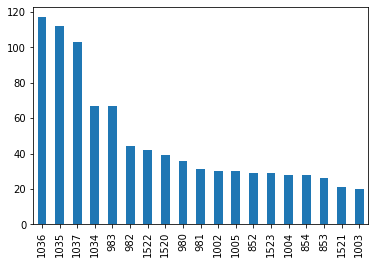

In [ ]:
df['LojaID'].value_counts(ascending=False).plot.bar();

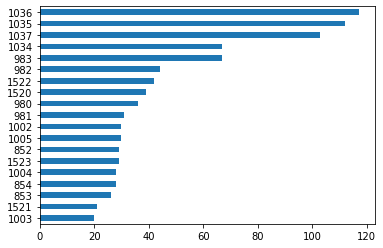

In [ ]:
df['LojaID'].value_counts(ascending=True).plot.barh();

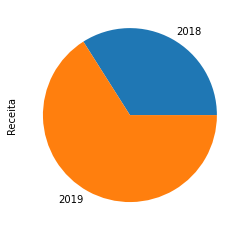

In [ ]:
#Gráfico de pizza (Receita Anual) 
df.groupby(df['Data'].dt.year)["Receita"].sum().plot.pie();

In [ ]:
# Total de Vendas por cidade
df['Cidade'].value_counts()

Natal        242
Salvador     240
Fortaleza    143
Recife       143
Aracaju      131
Name: Cidade, dtype: int64

# Adicionando um título no gráfico e alterando o nome dos eixos 

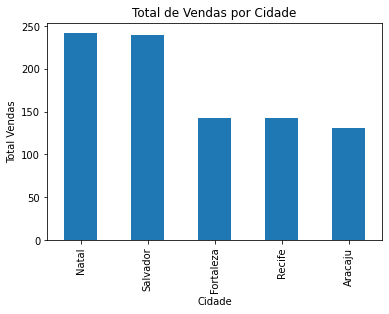

In [ ]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = "Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

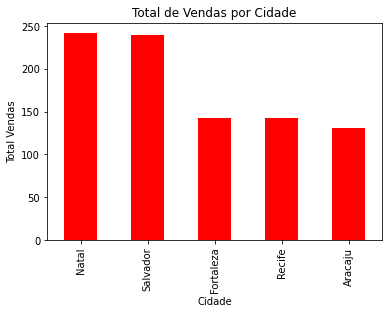

In [ ]:
# trocando a cor do gráfico
df['Cidade'].value_counts().plot.bar(title = "Total de Vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
# Alterando o estilo
#acessar https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html 
plt.style.use("ggplot")

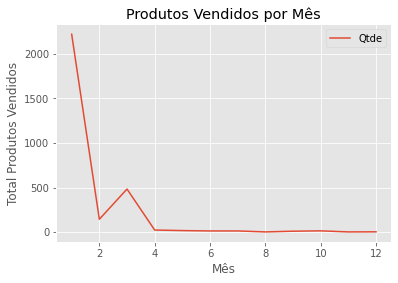

In [ ]:
# Quantidade de produtos vendidos por mês
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2220
2      144
3      483
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano Venda'] == 2019]

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1547
2     128
3     476
4      12
Name: Qtde, dtype: int64

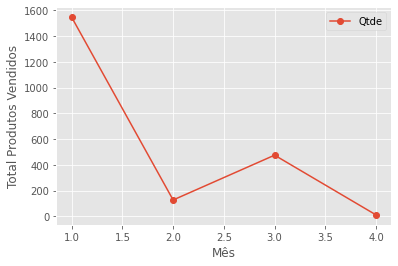

In [ ]:
# Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

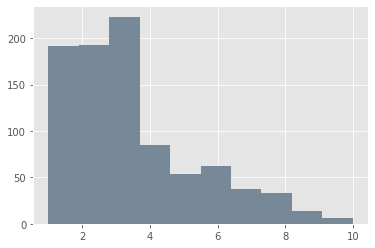

In [ ]:
# Histograma
# Acessar https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
plt.hist(df['Qtde'], color="lightslategray");

# Gráfico de Dispersão - scatter (Dia venda x receita)

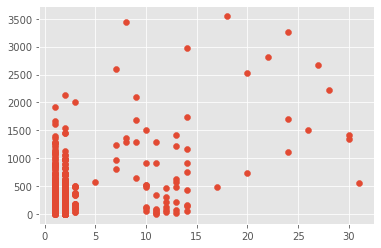

In [ ]:
plt.scatter(x= df_2019["dia_venda"], y= df_2019["Receita"]);

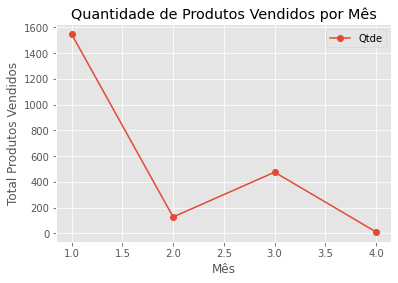

In [ ]:
# Salvando em uma imagem .png

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Grafico Qtde x Mes.png")